# Урок 4. Тесты для 3 и более групп сравнения, post-hoc тестирование

## Домашнее задание  
Поработаем с таблицами, для которых на предыдущем занятии вы изучали описательные статистики.
Сформулируйте несколько гипотез для 3-х групп или нескольких факторов, которые можно проверить на имеющихся данных. Укажите, зависимые или независимые выборки, ЗП, НП.
Выберите подходящий тест и проверьте ваши предположения.

Задание выполняется на языке R и предоставляется в формате Google Colab

### Чтение файлов

In [152]:
# install.packages("tidyverse")
install.packages("readxl")
install.packages("writexl")
install.packages("ggplot2")
install.packages("gplots")
# install.packages("skimr")
# install.packages("psych")
# install.packages("gridExtra")
# install.packages("moments")
install.packages("fitdistrplus")
# install.packages("data.table")
install.packages("car")
install.packages("rstatix")
install.packages("emmeans")
install.packages("ez")
install.packages("MASS")
install.packages("tidyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [154]:
# library(tidyverse)
library(dplyr)
require(readxl)
library(writexl)
# library(skimr)
# library(psych)
library(ggplot2)
library(gplots)
# library(gridExtra)
# library(moments)
library(car)
library(fitdistrplus)
library(rstatix)
library(emmeans)
library(ez)
library(MASS)
library(tidyr)

In [3]:
data <- read_xlsx("/content/21_4_files/data.xlsx", sheet = 1) %>%
  rename_with(make.names)
data

New names:
• `Choi...25` -> `Choi...21`
• `Tgi...26` -> `Tgi...22`
• `HDLi...27` -> `HDLi...23`
• `LDLi...28` -> `LDLi...24`
• `Choi...29` -> `Choi...25`
• `Tgi...30` -> `Tgi...26`
• `HDLi...31` -> `HDLi...27`
• `LDLi...32` -> `LDLi...28`


Vial.number,Group,Age,Plasma.volume,Ht,Wt,BMI,Sys,Dia,PR,⋯,G1.LDLi,G2.LDLi,G3.LDLi,S0.LDLi,S1.LDLi,S2.LDLi,S3.LDLi,B.LDLi,F.LDLi,HM.LDLi
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,63,6.5,163,84.0,31.61579,125,76,67,⋯,4.090,68.910,3.570,3.980,28.180,42.460,1.950,0.020,1.67,13.02
2,0,47,5.5,179,111.0,34.64311,125,82,65,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,1,57,7.0,164,80.0,29.74420,132,80,92,⋯,5.160,68.220,3.110,4.640,30.430,39.860,1.560,0.020,1.69,14.16
4,1,72,5.0,160,58.8,22.96875,130,90,68,⋯,3.950,68.030,4.500,3.780,29.370,41.130,2.200,0.020,1.89,13.89
5,1,57,5.0,180,71.0,21.91358,135,75,70,⋯,4.630,66.910,4.030,4.440,28.540,40.640,1.950,0.020,2.03,14.25
6,1,79,6.2,160,64.0,25.00000,110,75,66,⋯,4.050,64.010,5.270,3.720,26.710,40.390,2.510,0.020,2.70,16.06
7,1,61,6.5,164,67.0,24.91077,124,82,84,⋯,4.100,65.990,4.700,4.030,28.440,39.990,2.330,0.020,1.61,13.82
8,1,70,5.5,162,61.0,23.24341,135,78,72,⋯,5.270,67.260,3.240,4.690,32.270,37.290,1.520,0.030,1.61,14.59
9,0,50,6.0,150,79.0,35.11111,142,95,88,⋯,3.970,67.590,4.220,4.420,27.990,41.190,2.180,0.050,1.55,13.26


In [4]:
names(data)

[1] "Vial.number"      "Group"            "Age"             
  [4] "Plasma.volume"    "Ht"               "Wt"              
  [7] "BMI"              "Sys"              "Dia"             
 [10] "PR"               "Sm"               "Dm"              
 [13] "HT"               "LVH"              "IHD"             
 [16] "MI"               "Str"              "A_C"             
 [19] "A_H"              "A_D"              "Choi...21"       
 [22] "Tgi...22"         "HDLi...23"        "LDLi...24"       
 [25] "Choi...25"        "Tgi...26"         "HDLi...27"       
 [28] "LDLi...28"        "AI"               "r.lat.min"       
 [31] "r.ant.min"        "r.pos.min"        "l.lat.min"       
 [34] "l.ant.min"        "l.pos.min"        "r.lat.max"       
 [37] "r.ant.max"        "r.pos.max"        "l.lat.max"       
 [40] "l.ant.max"        "l.pos.max"        "carotid.IMT.mean"
 [43] "Plaque"           "Statins"          "GPHDL1"          
 [46] "GPHDL2"           "GPHDL3"           "GPHDL4"          
 [49] "GPHDL5"           "GPHDL6"           "GPHDL7"          
 [52] "GPHDL8"           "GPHDL9"           "GPHDL10"         
 [55] "GPHDL11"          "GPHDL12"          "GPHDL13"         
 [58] "GPHDL14"          "GPHDL15"          "GPHDL16"         
 [61] "GPHDL17"          "GPHDL18"          "GPHDL19"         
 [64] "GPHDL20"          "GPHDL21"          "GPHDL22"         
 [67] "sum_auc.HDLi"     "LB.HDLi"          "HB.HDLi"         
 [70] "G1.HDLi"          "G2.HDLi"          "G3.HDLi"         
 [73] "S0.HDLi"          "S1.HDLi"          "S2.HDLi"         
 [76] "S3.HDLi"          "B.HDLi"           "F.HDLi"          
 [79] "HM.HDLi"          "GPLDL1"           "GPLDL2"          
 [82] "GPLDL3"           "GPLDL4"           "GPLDL5"          
 [85] "GPLDL6"           "GPLDL7"           "GPLDL8"          
 [88] "GPLDL9"           "GPLDL10"          "GPLDL11"         
 [91] "GPLDL12"          "GPLDL13"          "GPLDL14"         
 [94] "GPLDL15"          "GPLDL16"          "GPLDL17"         
 [97] "GPLDL18"          "GPLDL19"          "GPLDL20"         
[100] "GPLDL21"          "GPLDL22"          "sum_auc.LDLi"    
[103] "LB.LDLi"          "HB.LDLi"          "G1.LDLi"         
[106] "G2.LDLi"          "G3.LDLi"          "S0.LDLi"         
[109] "S1.LDLi"          "S2.LDLi"          "S3.LDLi"         
[112] "B.LDLi"           "F.LDLi"           "HM.LDLi"

In [5]:
# Создадим список колонок, которые мы переведем в Factor
factor_cols <- c("Vial.number", "Group", "Sm", "Dm", "HT", "LVH", "IHD", "MI", "Str", "A_C", "A_H", "A_D", "Plaque", "Statins")

In [6]:
# Напишем функцию, которая переведет колонки в Factor и Numeric

convert_columns <- function(data, columns) {
  data <- mutate(data, across(all_of(columns), as.factor),
                        across(!all_of(columns), as.numeric))
  return(data)
}

In [7]:
# Применим функцию к нашей объединённой таблице
data <- convert_columns(data, factor_cols)
data

Vial.number,Group,Age,Plasma.volume,Ht,Wt,BMI,Sys,Dia,PR,⋯,G1.LDLi,G2.LDLi,G3.LDLi,S0.LDLi,S1.LDLi,S2.LDLi,S3.LDLi,B.LDLi,F.LDLi,HM.LDLi
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,63,6.5,163,84.0,31.61579,125,76,67,⋯,4.090,68.910,3.570,3.980,28.180,42.460,1.950,0.020,1.67,13.02
2,0,47,5.5,179,111.0,34.64311,125,82,65,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,1,57,7.0,164,80.0,29.74420,132,80,92,⋯,5.160,68.220,3.110,4.640,30.430,39.860,1.560,0.020,1.69,14.16
4,1,72,5.0,160,58.8,22.96875,130,90,68,⋯,3.950,68.030,4.500,3.780,29.370,41.130,2.200,0.020,1.89,13.89
5,1,57,5.0,180,71.0,21.91358,135,75,70,⋯,4.630,66.910,4.030,4.440,28.540,40.640,1.950,0.020,2.03,14.25
6,1,79,6.2,160,64.0,25.00000,110,75,66,⋯,4.050,64.010,5.270,3.720,26.710,40.390,2.510,0.020,2.70,16.06
7,1,61,6.5,164,67.0,24.91077,124,82,84,⋯,4.100,65.990,4.700,4.030,28.440,39.990,2.330,0.020,1.61,13.82
8,1,70,5.5,162,61.0,23.24341,135,78,72,⋯,5.270,67.260,3.240,4.690,32.270,37.290,1.520,0.030,1.61,14.59
9,0,50,6.0,150,79.0,35.11111,142,95,88,⋯,3.970,67.590,4.220,4.420,27.990,41.190,2.180,0.050,1.55,13.26


### 1-way ANOVA
В качестве зависимых переменных  возьмем индекс атерогенности, среднее значение комплекса ИМ сонных артерий, индекс массы тела (AI, carotid.IMT.mean, BMI). Фактором сравнения выступит степень бляшки (Plaque).
Также

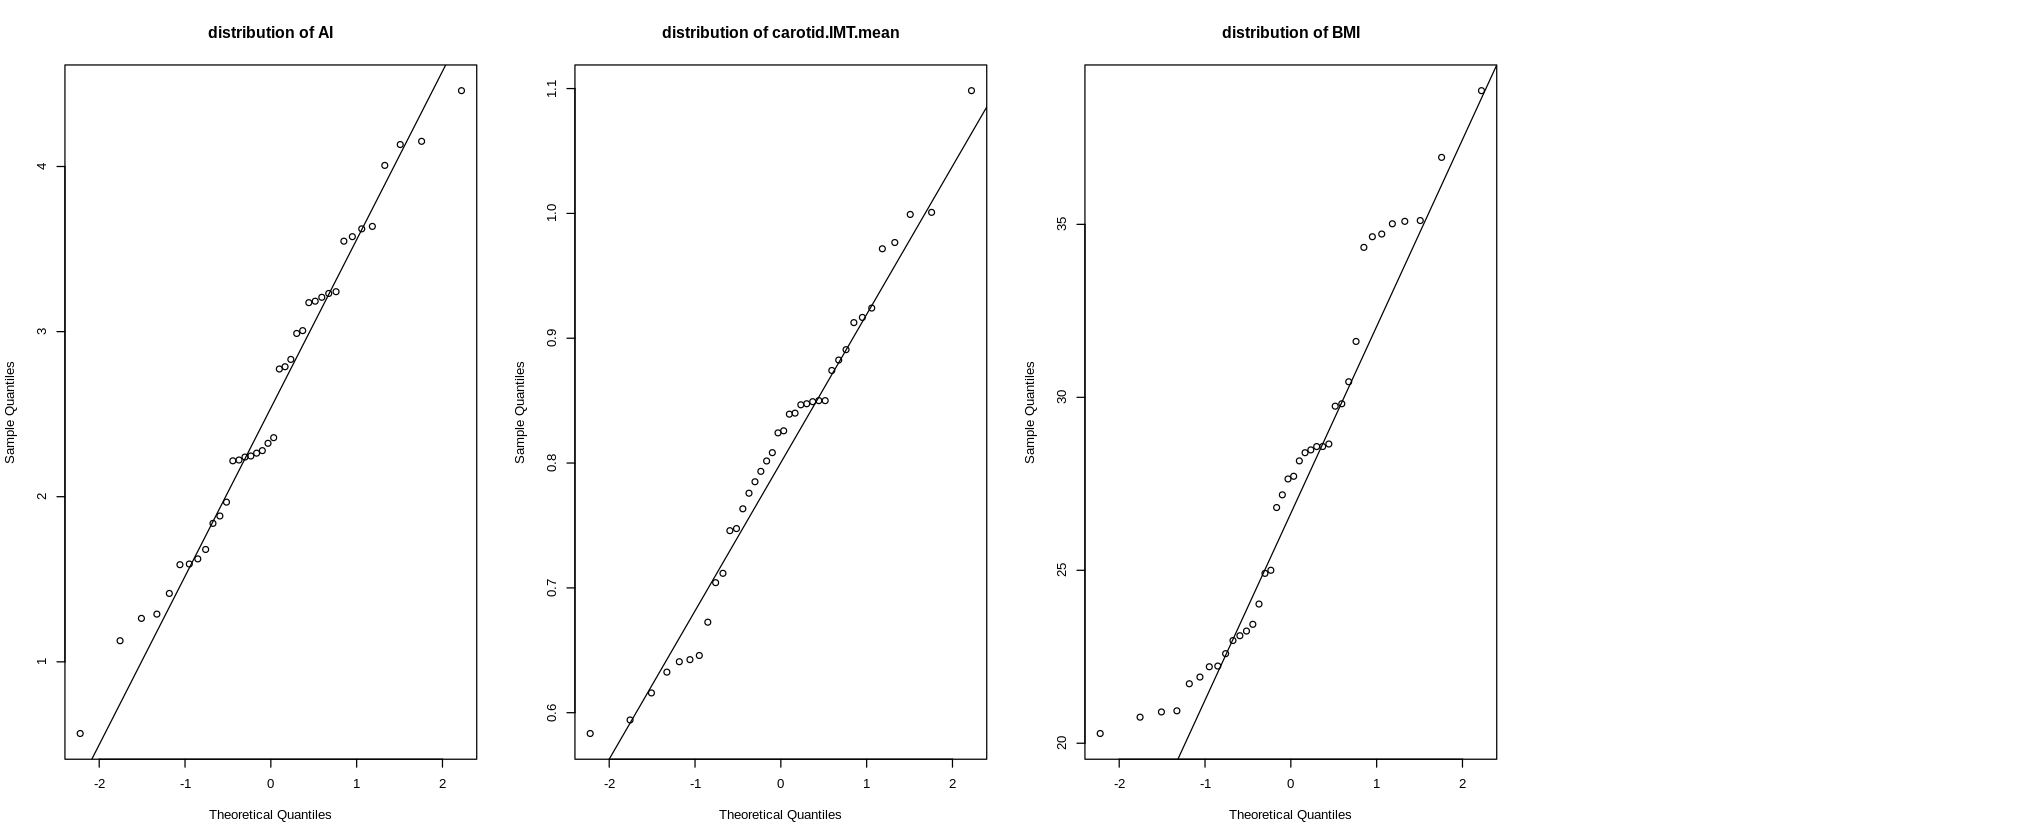

In [8]:
# Посмотрим распределение каждой из переменных
options(repr.plot.width = 17, repr.plot.height = 7)
par(mfrow=c(1,4))

qqnorm(data$AI, main="distribution of AI")
qqline(data$AI)

qqnorm(data$carotid.IMT.mean, main="distribution of carotid.IMT.mean")
qqline(data$carotid.IMT.mean)

# qqnorm(data$Plaque, main="distribution of Plaque")
# qqnorm(data$Plaque)

qqnorm(data$BMI, main="distribution of BMI")
qqline(data$BMI)

Распределение AI и carotid.IMT.mean близко к нормальному

In [108]:
options(repr.plot.width = 7, repr.plot.height = 7)

In [10]:
# Список всех распределений
possible_distributions <- c("norm", "lnorm", "exp", "gamma", "weibull", "logis", "pois")

<simpleError in optim(par = vstart, fn = fnobj, fix.arg = fix.arg, obs = data,     gr = gradient, ddistnam = ddistname, hessian = TRUE, method = meth,     lower = lower, upper = upper, ...): initial value in 'vmmin' is not finite>
Fitting of the distribution ' lnorm ' by maximum likelihood 
Parameters : 
         estimate Std. Error
meanlog 3.2987042 0.02994507
sdlog   0.1845938 0.02117157
Loglikelihood:  -115.0657   AIC:  234.1314   BIC:  237.4066 
Correlation matrix:
        meanlog sdlog
meanlog       1     0
sdlog         0     1



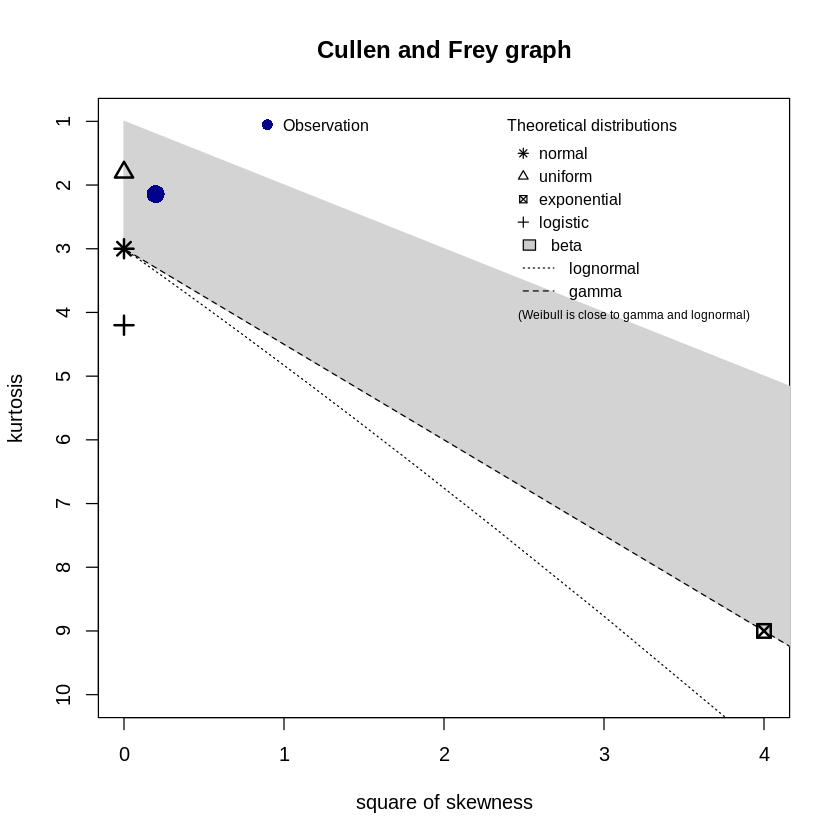

In [11]:
desc <- descdist(data$BMI, discrete = FALSE)

best_fit <- NULL
best_summary <- NULL

for (dist in possible_distributions) {
  fit <- tryCatch(fitdist(data$BMI, dist), error = function(e) e)
  if (!inherits(fit, "error")) {
    summary_fit <- summary(fit)
    if (is.null(best_fit) || summary_fit$loglik > best_summary$loglik) {
      best_fit <- fit
      best_summary <- summary_fit
    }
  }
}

if (!is.null(best_fit)) {
  print(best_summary)
} else {
  print("No suitable distribution found.")
}

Переменная BMI имеет log-нормальное распределение

In [12]:
model1 <- aov(BMI ~ factor(Plaque), data)
model2 <- aov(AI ~ factor(Plaque), data)
model3 <- aov(carotid.IMT.mean ~ factor(Plaque), data)
model4 <- aov(AI ~ factor(Statins), data)

In [13]:
summary(model1)
summary(model2)
summary(model3)
summary(model4)

               Df Sum Sq Mean Sq F value Pr(>F)
factor(Plaque)  3   25.4   8.454   0.292  0.831
Residuals      34  985.4  28.982               

               Df Sum Sq Mean Sq F value Pr(>F)
factor(Plaque)  3   5.10  1.7001    2.01  0.131
Residuals      34  28.76  0.8459               

               Df Sum Sq Mean Sq F value Pr(>F)  
factor(Plaque)  3 0.1546 0.05152   4.192 0.0125 *
Residuals      34 0.4179 0.01229                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                Df Sum Sq Mean Sq F value Pr(>F)  
factor(Statins)  1  5.167   5.167    6.33 0.0166 *
Residuals       35 28.570   0.816                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
1 observation deleted due to missingness

---
**Дополнительные тесты через другие пакеты**

In [35]:
ez_model <- ezANOVA(data,
                    dv = carotid.IMT.mean,
                    wid = Vial.number,
                    # between = .(Plaque, BMI),
                    between = Statins,
                    detailed = TRUE,
                    return_aov = TRUE)
ez_model$ANOVA

Warning message:
“You have removed one or more levels from variable "Statins". Refactoring for ANOVA.”
Warning message:
“Data is unbalanced (unequal N per group). Make sure you specified a well-considered value for the type argument to ezANOVA().”
Coefficient covariances computed by hccm()



,Effect,DFn,DFd,SSn,SSd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,Statins,1,35,0.006977705,0.5369367,0.4548389,0.5044765,,0.01282868


По результатам проведенного анализа мы видим, что нет значимой связи между Plaque и BMI. Также связь отсутствует между Plaque и AI. Между переменными `carotid.IMT.mean` и `Plaque` присутствует четко выраженная связь (что логично).
Также видна связь между показателями `Statins` и `AI`

In [15]:
#Тест Тьюки для всех моделей
tukey1 <- emmeans(model1, pairwise ~ factor(Plaque), adjust = "tukey")
tukey2 <- emmeans(model2, pairwise ~ factor(Plaque), adjust = "tukey")
tukey3 <- emmeans(model3, pairwise ~ factor(Plaque), adjust = "tukey")
tukey4 <- emmeans(model4, pairwise ~ factor(Statins), adjust = "tukey")

# Вывод результатов
summary(tukey1$contrasts)
summary(tukey2$contrasts)
summary(tukey3$contrasts)
summary(tukey4$contrasts)

,contrast,estimate,SE,df,t.ratio,p.value
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Plaque0 - Plaque1,0.09787784,3.404817,34,0.02874687,0.9999913
2,Plaque0 - Plaque2,-1.28679461,3.371272,34,-0.38169414,0.9807584
3,Plaque0 - Plaque3,-2.38466214,4.395600,34,-0.54251113,0.9479244
4,Plaque1 - Plaque2,-1.38467245,1.907079,34,-0.72606971,0.8859833
5,Plaque1 - Plaque3,-2.48253998,3.404817,34,-0.72912572,0.8847346
6,Plaque2 - Plaque3,-1.09786753,3.371272,34,-0.32565383,0.9878581


,contrast,estimate,SE,df,t.ratio,p.value
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Plaque0 - Plaque1,-0.42012565,0.5816745,34,-0.72226936,0.8875266
2,Plaque0 - Plaque2,-1.05896239,0.5759436,34,-1.83865656,0.2734103
3,Plaque0 - Plaque3,-0.38423609,0.7509385,34,-0.51167450,0.9557442
4,Plaque1 - Plaque2,-0.63883674,0.3258029,34,-1.96080757,0.2227373
5,Plaque1 - Plaque3,0.03588956,0.5816745,34,0.06170042,0.9999139
6,Plaque2 - Plaque3,0.67472630,0.5759436,34,1.17151463,0.6485524


,contrast,estimate,SE,df,t.ratio,p.value
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Plaque0 - Plaque1,-0.20866667,0.07011429,34,-2.9760934,0.02617478
2,Plaque0 - Plaque2,-0.22009804,0.06942349,34,-3.1703684,0.01618981
3,Plaque0 - Plaque3,-0.29527778,0.09051716,34,-3.2621195,0.01282557
4,Plaque1 - Plaque2,-0.01143137,0.03927186,34,-0.2910831,0.99125402
5,Plaque1 - Plaque3,-0.08661111,0.07011429,34,-1.2352848,0.60926934
6,Plaque2 - Plaque3,-0.07517974,0.06942349,34,-1.0829150,0.70214879


,contrast,estimate,SE,df,t.ratio,p.value
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Statins0 - Statins1,0.7828162,0.3111325,35,2.516022,0.01660774


**Интерпретация результатов теста Тьюки**  
    В первой (BMI) и второй (AI) моделях различия между группами Plaque не являются статистически значимыми. Все значения p-value значительно больше 0,05.  
    В третьей модели есть значимые различия между группой Plaque0 и Plaque1 (p = 0.026), Plaque0 и Plaque2 (p = 0.016), Plaque0 и Plaque3 (p = 0.013), однако между группами (Plaque1, Plaque2, Plaque3) различий нет.  
    Различие между группами Statins0 и Statins1 также является статистически значимым (p = 0.017).

In [16]:
# Функция для проведения ANOVA и теста Тьюки на множественных данных
anova_tukey_analysis <- function(data, columns, factor_column) {
  results <- list()

  # Удаление строк с пропущенными значениями
  f_data <- na.omit(data)

  for (column in columns) {
    # Создание формулы с помощью paste
    formula <- as.formula(paste(column, "~ factor(", factor_column, ")", sep = ""))
    model <- aov(formula, f_data)
    summary_model <- summary(model)

    emmeans_formula <- as.formula(paste("pairwise ~ factor(", factor_column, ")", sep = ""))
    # emmeans_formula <- emmeans(model, ~ factor(get(factor_column, data)))
    # tukey_summary <- summary(pairs(emmeans_model, adjust = "tukey"))
    # tukey4 <- emmeans(model4, pairwise ~ factor(Statins), adjust = "tukey")
    tukey <- emmeans(model, emmeans_formula, adjust = "tukey")
    tukey_summary <- summary(tukey$contrasts)

    results[[column]] <- list(
      "ANOVA Summary" = summary_model,
      "Tukey Test" = tukey_summary
    )
  }

  return(results)
}

In [17]:
cols <- c("GPHDL1", "GPHDL2", "GPHDL3", "LB.LDLi", "HB.LDLi", "G1.LDLi", "G2.LDLi")
factor_col <- "Plaque"

In [18]:
anova_tukey_analysis(data, cols, factor_col)

$GPHDL1
$GPHDL1$`ANOVA Summary`
               Df  Sum Sq  Mean Sq F value Pr(>F)
factor(Plaque)  3 0.01956 0.006520   0.827  0.493
Residuals      22 0.17347 0.007885               

$GPHDL1$`Tukey Test`
 contrast          estimate     SE df t.ratio p.value
 Plaque0 - Plaque1  -0.0524 0.0927 22  -0.565  0.9413
 Plaque0 - Plaque2   0.0050 0.0924 22   0.054  0.9999
 Plaque0 - Plaque3  -0.0125 0.1088 22  -0.115  0.9994
 Plaque1 - Plaque2   0.0574 0.0371 22   1.549  0.4268
 Plaque1 - Plaque3   0.0399 0.0683 22   0.585  0.9356
 Plaque2 - Plaque3  -0.0175 0.0678 22  -0.258  0.9938

P value adjustment: tukey method for comparing a family of 4 estimates 


$GPHDL2
$GPHDL2$`ANOVA Summary`
               Df Sum Sq Mean Sq F value Pr(>F)  
factor(Plaque)  3  2.685  0.8949   2.551 0.0817 .
Residuals      22  7.718  0.3508                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

$GPHDL2$`Tukey Test`
 contrast          estimate    SE df t.ratio p.value
 Plaque0 - Plaque1 

Использование такой функции позволяет проводить поточное тестирование ANOVA для большого количества переменных, тем самым повышая производительность анализа.  
По исследованным показателям обнаружена слабая связь между фракцией `GPHDL2` и `Plaque` (p-value = 0.0817). Тест Тьюки не показывает зависимость (все p-value больше 0.05).  
Более отчетливая связь между `G1.LDLi` и `Plaque` (p = 0.0178). По результатам теста Тьюки видна разница только `Plaque2 - Plaque3` (p = 0.0401).


### 2-way ANOVA
Проверим взаимосвязь между Индексом атерогенности (AI), размером бляшки (Plaque) и ишемической болезнью сердца (IHD)

In [19]:
model <- aov(AI ~ factor(Plaque) * factor(Sm), data)
summary(model)

                          Df Sum Sq Mean Sq F value Pr(>F)  
factor(Plaque)             3  5.100  1.7001   2.084 0.1218  
factor(Sm)                 1  2.659  2.6592   3.260 0.0804 .
factor(Plaque):factor(Sm)  1  0.000  0.0000   0.000 0.9947  
Residuals                 32 26.100  0.8156                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Тест показал слабую, статистически не значимую, связь между Индексом атерогенности и курением. При этом нет никакой связи между размером бляшки и курением.

### ANСOVA  
Для анализа возьмем среднюю толщину комплекса ИМ (carotid.IMT.mean) с факторами Гипертрофии ЛЖ (LVH) и размером бляшки (Plaque). В качестве ковариаты возьмем Индекс атерогенности (AI).

In [20]:
ancova <- lm(carotid.IMT.mean ~ factor(Plaque) + factor(LVH) + AI, data)
summary(ancova)


Call:
lm(formula = carotid.IMT.mean ~ factor(Plaque) + factor(LVH) + 
    AI, data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.198942 -0.058544 -0.005474  0.056433  0.289008 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.598108   0.077590   7.709 8.68e-09 ***
factor(Plaque)1  0.207738   0.073162   2.839  0.00779 ** 
factor(Plaque)2  0.217786   0.077446   2.812  0.00834 ** 
factor(Plaque)3  0.294981   0.097529   3.025  0.00488 ** 
factor(LVH)1    -0.001143   0.042748  -0.027  0.97884    
AI               0.002754   0.021540   0.128  0.89905    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1142 on 32 degrees of freedom
Multiple R-squared:  0.2704,	Adjusted R-squared:  0.1564 
F-statistic: 2.372 on 5 and 32 DF,  p-value: 0.06129


По результатам анализа видим четкую взаимосвязь между группами по размеру бляшки (p < 0.01), а также высокую значимость переменной даже без влияния каких-либо факторов (p = 0.00000000868). Множественное R$^2$ = 0.2704 показывает, что модель объясняет 27% изменений переменной `carotid.IMT.mean`. Р = 0.06129 для обей модели указывет на то, что модель в целом не является значимой на уровне 0.05.  
Так как связь все таки видна, проверим ее с помощью критерия Краскела — Уоллиса

In [21]:
result_kruskal <- data %>%
  kruskal_test(carotid.IMT.mean ~ factor(Plaque))
print(result_kruskal)

# A tibble: 1 × 6
  .y.                  n statistic    df      p method        
* <chr>            <int>     <dbl> <int>  <dbl> <chr>         
1 carotid.IMT.mean    38      9.74     3 0.0209 Kruskal-Wallis


In [22]:
# Подсчет размера эффекта
effect_size <- data %>%
  kruskal_effsize(carotid.IMT.mean ~ factor(Plaque))
print(effect_size)

# A tibble: 1 × 5
  .y.                  n effsize method  magnitude
* <chr>            <int>   <dbl> <chr>   <ord>    
1 carotid.IMT.mean    38   0.198 eta2[H] large    


Результат теста Краскела — Уоллиса (p = 0.0209) указывает на статистически значимую связь `carotid.IMT.mean` и `Plaque`.  
Проведем тест Данна, чтобы понять степень значимости каждой из подгрупп `Plaque` для `carotid.IMT.mean`.

In [31]:
dunn_result <- data %>%
  dunn_test(carotid.IMT.mean ~ Plaque, p.adjust.method = "BH")
print(dunn_result)

# A tibble: 6 × 9
  .y.            group1 group2    n1    n2 statistic       p  p.adj p.adj.signif
* <chr>          <chr>  <chr>  <int> <int>     <dbl>   <dbl>  <dbl> <chr>       
1 carotid.IMT.m… 0      1          3    15     2.48  0.0131  0.0262 *           
2 carotid.IMT.m… 0      2          3    17     2.61  0.00893 0.0262 *           
3 carotid.IMT.m… 0      3          3     3     2.99  0.00275 0.0165 *           
4 carotid.IMT.m… 1      2         15    17     0.194 0.846   0.846  ns          
5 carotid.IMT.m… 1      3         15     3     1.38  0.166   0.237  ns          
6 carotid.IMT.m… 2      3         17     3     1.29  0.197   0.237  ns          


---
*

In [38]:
ancova_model <- aov(carotid.IMT.mean ~ Plaque + AI, data)
Anova(ancova_model, type = "III")

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.7807047525,1,61.68531635,4.708092e-09
Plaque,0.1474691330,3,3.88396087,1.753820e-02
AI,0.0002049003,1,0.01618965,8.995238e-01
Residuals,0.4176562326,33,NA,NA


### MANOVA  
Проанализируем данные хроматографии

In [119]:
df_ch <- data %>%
  dplyr::select(GPHDL1, GPHDL2, GPHDL3, GPHDL4, GPHDL5, GPHDL6, GPHDL7, GPHDL8, GPHDL9, GPHDL10, GPHDL11, GPHDL12,
  GPHDL13, GPHDL14, GPHDL15, GPHDL16, GPHDL17, GPHDL18, GPHDL19, GPHDL20, GPHDL21, GPHDL22,
  sum_auc.HDLi, LB.HDLi, HB.HDLi, G1.HDLi, G2.HDLi, G3.HDLi, S0.HDLi, S1.HDLi, S2.HDLi, S3.HDLi, B.HDLi, F.HDLi, HM.HDLi,
  GPLDL1, GPLDL2, GPLDL3, GPLDL4, GPLDL5, GPLDL6, GPLDL7, GPLDL8, GPLDL9, GPLDL10, GPLDL11, GPLDL12,
  GPLDL13, GPLDL14, GPLDL15, GPLDL16, GPLDL17, GPLDL18, GPLDL19, GPLDL20, GPLDL21, GPLDL22,
  sum_auc.LDLi, LB.LDLi, HB.LDLi, G1.LDLi, G2.LDLi, G3.LDLi, S0.LDLi, S1.LDLi, S2.LDLi, S3.LDLi, B.LDLi, F.LDLi, HM.LDLi,
  BMI, AI, carotid.IMT.mean, Plaque)
df_ch

GPHDL1,GPHDL2,GPHDL3,GPHDL4,GPHDL5,GPHDL6,GPHDL7,GPHDL8,GPHDL9,GPHDL10,⋯,S1.LDLi,S2.LDLi,S3.LDLi,B.LDLi,F.LDLi,HM.LDLi,BMI,AI,carotid.IMT.mean,Plaque
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.3800000,1.780000,0.1400000,0.05000000,0.730000,2.900000,1.570000,2.570000,5.460000,18.64000,⋯,28.180,42.460,1.950,0.020,1.67,13.02,31.61579,1.6232772,0.6425000,1
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,34.64311,3.6372361,0.8400000,1
0.4300000,1.300000,0.2300000,0.05000000,0.590000,2.620000,1.620000,3.860000,4.200000,18.92000,⋯,30.430,39.860,1.560,0.020,1.69,14.16,29.74420,3.5751295,0.8500000,3
0.4100000,3.860000,0.3100000,0.10000000,0.960000,3.190000,2.420000,3.750000,6.280000,23.81000,⋯,29.370,41.130,2.200,0.020,1.89,13.89,22.96875,3.6223507,0.8241667,2
0.5000000,1.790000,0.2300000,0.06000000,0.770000,2.960000,1.760000,3.000000,5.330000,18.72000,⋯,28.540,40.640,1.950,0.020,2.03,14.25,21.91358,1.2630208,1.0983333,1
0.4000000,3.690000,0.1700000,0.03000000,0.800000,3.040000,1.620000,3.230000,6.140000,21.28000,⋯,26.710,40.390,2.510,0.020,2.70,16.06,25.00000,3.2310178,0.8475000,2
0.3700000,2.960000,0.2200000,0.05000000,1.000000,3.000000,2.110000,3.060000,6.910000,22.21000,⋯,28.440,39.990,2.330,0.020,1.61,13.82,24.91077,3.2078560,0.6725000,1
0.5600000,2.760000,0.4600000,0.08000000,1.110000,2.960000,3.560000,4.170000,6.100000,23.37000,⋯,32.270,37.290,1.520,0.030,1.61,14.59,23.24341,3.1754386,0.7850000,1
0.4100000,2.140000,0.2200000,0.12000000,0.930000,2.550000,2.060000,2.950000,6.250000,19.91000,⋯,27.990,41.190,2.180,0.050,1.55,13.26,35.11111,2.8315946,0.8491667,1


In [120]:
# Удаляем пропущенные значения
df_ch <- na.omit(df_ch)
df_ch

GPHDL1,GPHDL2,GPHDL3,GPHDL4,GPHDL5,GPHDL6,GPHDL7,GPHDL8,GPHDL9,GPHDL10,⋯,S1.LDLi,S2.LDLi,S3.LDLi,B.LDLi,F.LDLi,HM.LDLi,BMI,AI,carotid.IMT.mean,Plaque
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.3800000,1.780000,0.1400000,0.05000000,0.730000,2.900000,1.570000,2.570000,5.460000,18.64000,⋯,28.180,42.460,1.950,0.02,1.67,13.02,31.61579,1.6232772,0.6425000,1
0.4300000,1.300000,0.2300000,0.05000000,0.590000,2.620000,1.620000,3.860000,4.200000,18.92000,⋯,30.430,39.860,1.560,0.02,1.69,14.16,29.74420,3.5751295,0.8500000,3
0.4100000,3.860000,0.3100000,0.10000000,0.960000,3.190000,2.420000,3.750000,6.280000,23.81000,⋯,29.370,41.130,2.200,0.02,1.89,13.89,22.96875,3.6223507,0.8241667,2
0.5000000,1.790000,0.2300000,0.06000000,0.770000,2.960000,1.760000,3.000000,5.330000,18.72000,⋯,28.540,40.640,1.950,0.02,2.03,14.25,21.91358,1.2630208,1.0983333,1
0.4000000,3.690000,0.1700000,0.03000000,0.800000,3.040000,1.620000,3.230000,6.140000,21.28000,⋯,26.710,40.390,2.510,0.02,2.70,16.06,25.00000,3.2310178,0.8475000,2
0.3700000,2.960000,0.2200000,0.05000000,1.000000,3.000000,2.110000,3.060000,6.910000,22.21000,⋯,28.440,39.990,2.330,0.02,1.61,13.82,24.91077,3.2078560,0.6725000,1
0.5600000,2.760000,0.4600000,0.08000000,1.110000,2.960000,3.560000,4.170000,6.100000,23.37000,⋯,32.270,37.290,1.520,0.03,1.61,14.59,23.24341,3.1754386,0.7850000,1
0.4100000,2.140000,0.2200000,0.12000000,0.930000,2.550000,2.060000,2.950000,6.250000,19.91000,⋯,27.990,41.190,2.180,0.05,1.55,13.26,35.11111,2.8315946,0.8491667,1
0.4200000,1.710000,0.2000000,0.06000000,0.640000,2.840000,1.590000,3.480000,4.660000,18.15000,⋯,28.110,43.200,2.230,0.02,2.30,13.11,29.81341,2.7872340,0.7041667,2


In [121]:
manova_model <- manova(cbind(GPHDL1, GPHDL2, GPHDL3, GPHDL4, GPHDL5, GPHDL6, GPHDL7, GPHDL8, GPHDL9, GPHDL10, GPHDL11, GPHDL12,
                            GPHDL13, GPHDL14, GPHDL15, GPHDL16, GPHDL17, GPHDL18, GPHDL19, GPHDL20, GPHDL21, GPHDL22,
                            sum_auc.HDLi, LB.HDLi, HB.HDLi, G1.HDLi, G2.HDLi, G3.HDLi, S0.HDLi, S1.HDLi, S2.HDLi, S3.HDLi, B.HDLi, F.HDLi, HM.HDLi,
                            GPLDL1, GPLDL2, GPLDL3, GPLDL4, GPLDL5, GPLDL6, GPLDL7, GPLDL8, GPLDL9, GPLDL10, GPLDL11, GPLDL12,
                            GPLDL13, GPLDL14, GPLDL15, GPLDL16, GPLDL17, GPLDL18, GPLDL19, GPLDL20, GPLDL21, GPLDL22,
                            sum_auc.LDLi, LB.LDLi, HB.LDLi, G1.LDLi, G2.LDLi, G3.LDLi, S0.LDLi, S1.LDLi, S2.LDLi, S3.LDLi, B.LDLi, F.LDLi, HM.LDLi)
                            ~ Plaque, data)
summary(manova_model)
# vif_values <- vif(manova_model)
# print(vif_values)

ERROR: Error in summary.manova(manova_model): residuals have rank 23 < 70


Анализ MANOVA завершается ошибкой, так как мы подали слишком большое количество переменных. Для уменьшения числа переменных нам необходимо произвести анализ главных компонент (PCA).

In [122]:
pca <- prcomp(df_ch %>%
  select(GPHDL1, GPHDL2, GPHDL3, GPHDL4, GPHDL5, GPHDL6, GPHDL7, GPHDL8, GPHDL9, GPHDL10, GPHDL11, GPHDL12,
        GPHDL13, GPHDL14, GPHDL15, GPHDL16, GPHDL17, GPHDL18, GPHDL19, GPHDL20, GPHDL21, GPHDL22,
        sum_auc.HDLi, LB.HDLi, HB.HDLi, G1.HDLi, G2.HDLi, G3.HDLi, S0.HDLi, S1.HDLi, S2.HDLi, S3.HDLi, B.HDLi, F.HDLi, HM.HDLi,
        GPLDL1, GPLDL2, GPLDL3, GPLDL4, GPLDL5, GPLDL6, GPLDL7, GPLDL8, GPLDL9, GPLDL10, GPLDL11, GPLDL12,
        GPLDL13, GPLDL14, GPLDL15, GPLDL16, GPLDL17, GPLDL18, GPLDL19, GPLDL20, GPLDL21, GPLDL22,
        sum_auc.LDLi, LB.LDLi, HB.LDLi, G1.LDLi, G2.LDLi, G3.LDLi, S0.LDLi, S1.LDLi, S2.LDLi, S3.LDLi, B.LDLi, F.LDLi, HM.LDLi
        ), scale. = TRUE)
summary(pca)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     4.2390 4.0261 3.0037 2.14927 1.95772 1.78742 1.60971
Proportion of Variance 0.2567 0.2316 0.1289 0.06599 0.05475 0.04564 0.03702
Cumulative Proportion  0.2567 0.4883 0.6171 0.68314 0.73790 0.78354 0.82055
                           PC8     PC9    PC10    PC11    PC12   PC13    PC14
Standard deviation     1.54737 1.32400 1.26817 1.18532 1.05789 0.9049 0.83761
Proportion of Variance 0.03421 0.02504 0.02297 0.02007 0.01599 0.0117 0.01002
Cumulative Proportion  0.85476 0.87980 0.90278 0.92285 0.93884 0.9505 0.96056
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     0.82664 0.74458 0.57726 0.51808 0.47192 0.40259 0.37188
Proportion of Variance 0.00976 0.00792 0.00476 0.00383 0.00318 0.00232 0.00198
Cumulative Proportion  0.97032 0.97824 0.98300 0.98683 0.99002 0.99233 0.99431
                          PC22    PC23    

Из результатов РСА не понятно какая переменная вносит наибольший вклад в каждую из компонент. Визуализируем загрузки главных компонент (PCs):

In [123]:
loadings <- pca$rotation

# Проверка загрузок главных компонент
print(loadings)

# Преобразование загрузок в удобочитаемый формат
loadings_df <- as.data.frame(loadings)

                      PC1          PC2          PC3          PC4          PC5
GPHDL1       -0.060230183  0.103879497 -0.067978920 -0.210533205 -0.269281846
GPHDL2       -0.214226585 -0.003329646 -0.065903155  0.073218663  0.054229139
GPHDL3       -0.114615615  0.172103410  0.017149179  0.044773647 -0.174322685
GPHDL4       -0.065940339 -0.001567015  0.083071836 -0.140335442 -0.298554380
GPHDL5       -0.194267502 -0.002076031  0.028326198 -0.059614152 -0.221416788
GPHDL6       -0.090416348  0.095041843 -0.055449927  0.045469799  0.119112123
GPHDL7       -0.163748076  0.106660208  0.038502465 -0.034209196 -0.110334072
GPHDL8       -0.036848150  0.172258176 -0.125766399  0.089138057 -0.084008017
GPHDL9       -0.179154688 -0.109063667 -0.023534110  0.009667063 -0.068201072
GPHDL10      -0.199706449  0.100389693  0.004078390 -0.007813515  0.106078124
GPHDL11      -0.022881808 -0.041796109 -0.140974856 -0.117473611 -0.076125029
GPHDL12      -0.194352731 -0.055808198  0.081365648  0.004757411

In [124]:
# сохраним полученный результат
loadings_df <- cbind(RowNames = rownames(loadings_df), loadings_df)
pca_results <- as.data.frame(pca$x)

# Создание списка для записи в разные листы Excel файла
results_list <- list(
  PCA_Results = pca_results,
  PCA_Loadings = loadings_df
)

# Запись данных в файл XLSX
write_xlsx(results_list, "/content/21_4_files/PCA_results.xlsx")

Визуализация загрузок поможет быстрее выявить наиболее приоритетные переменные.

In [125]:
class(loadings_df$PrincipalComponent)

[1] "NULL"

In [126]:
# Преобразование данных загрузок в длинный формат
loadings_long <- loadings_df %>%
  # mutate(PrincipalComponent = as.character(PrincipalComponent)) %>%
    pivot_longer(cols = -RowNames, names_to = "PrincipalComponent", values_to = "Loading")

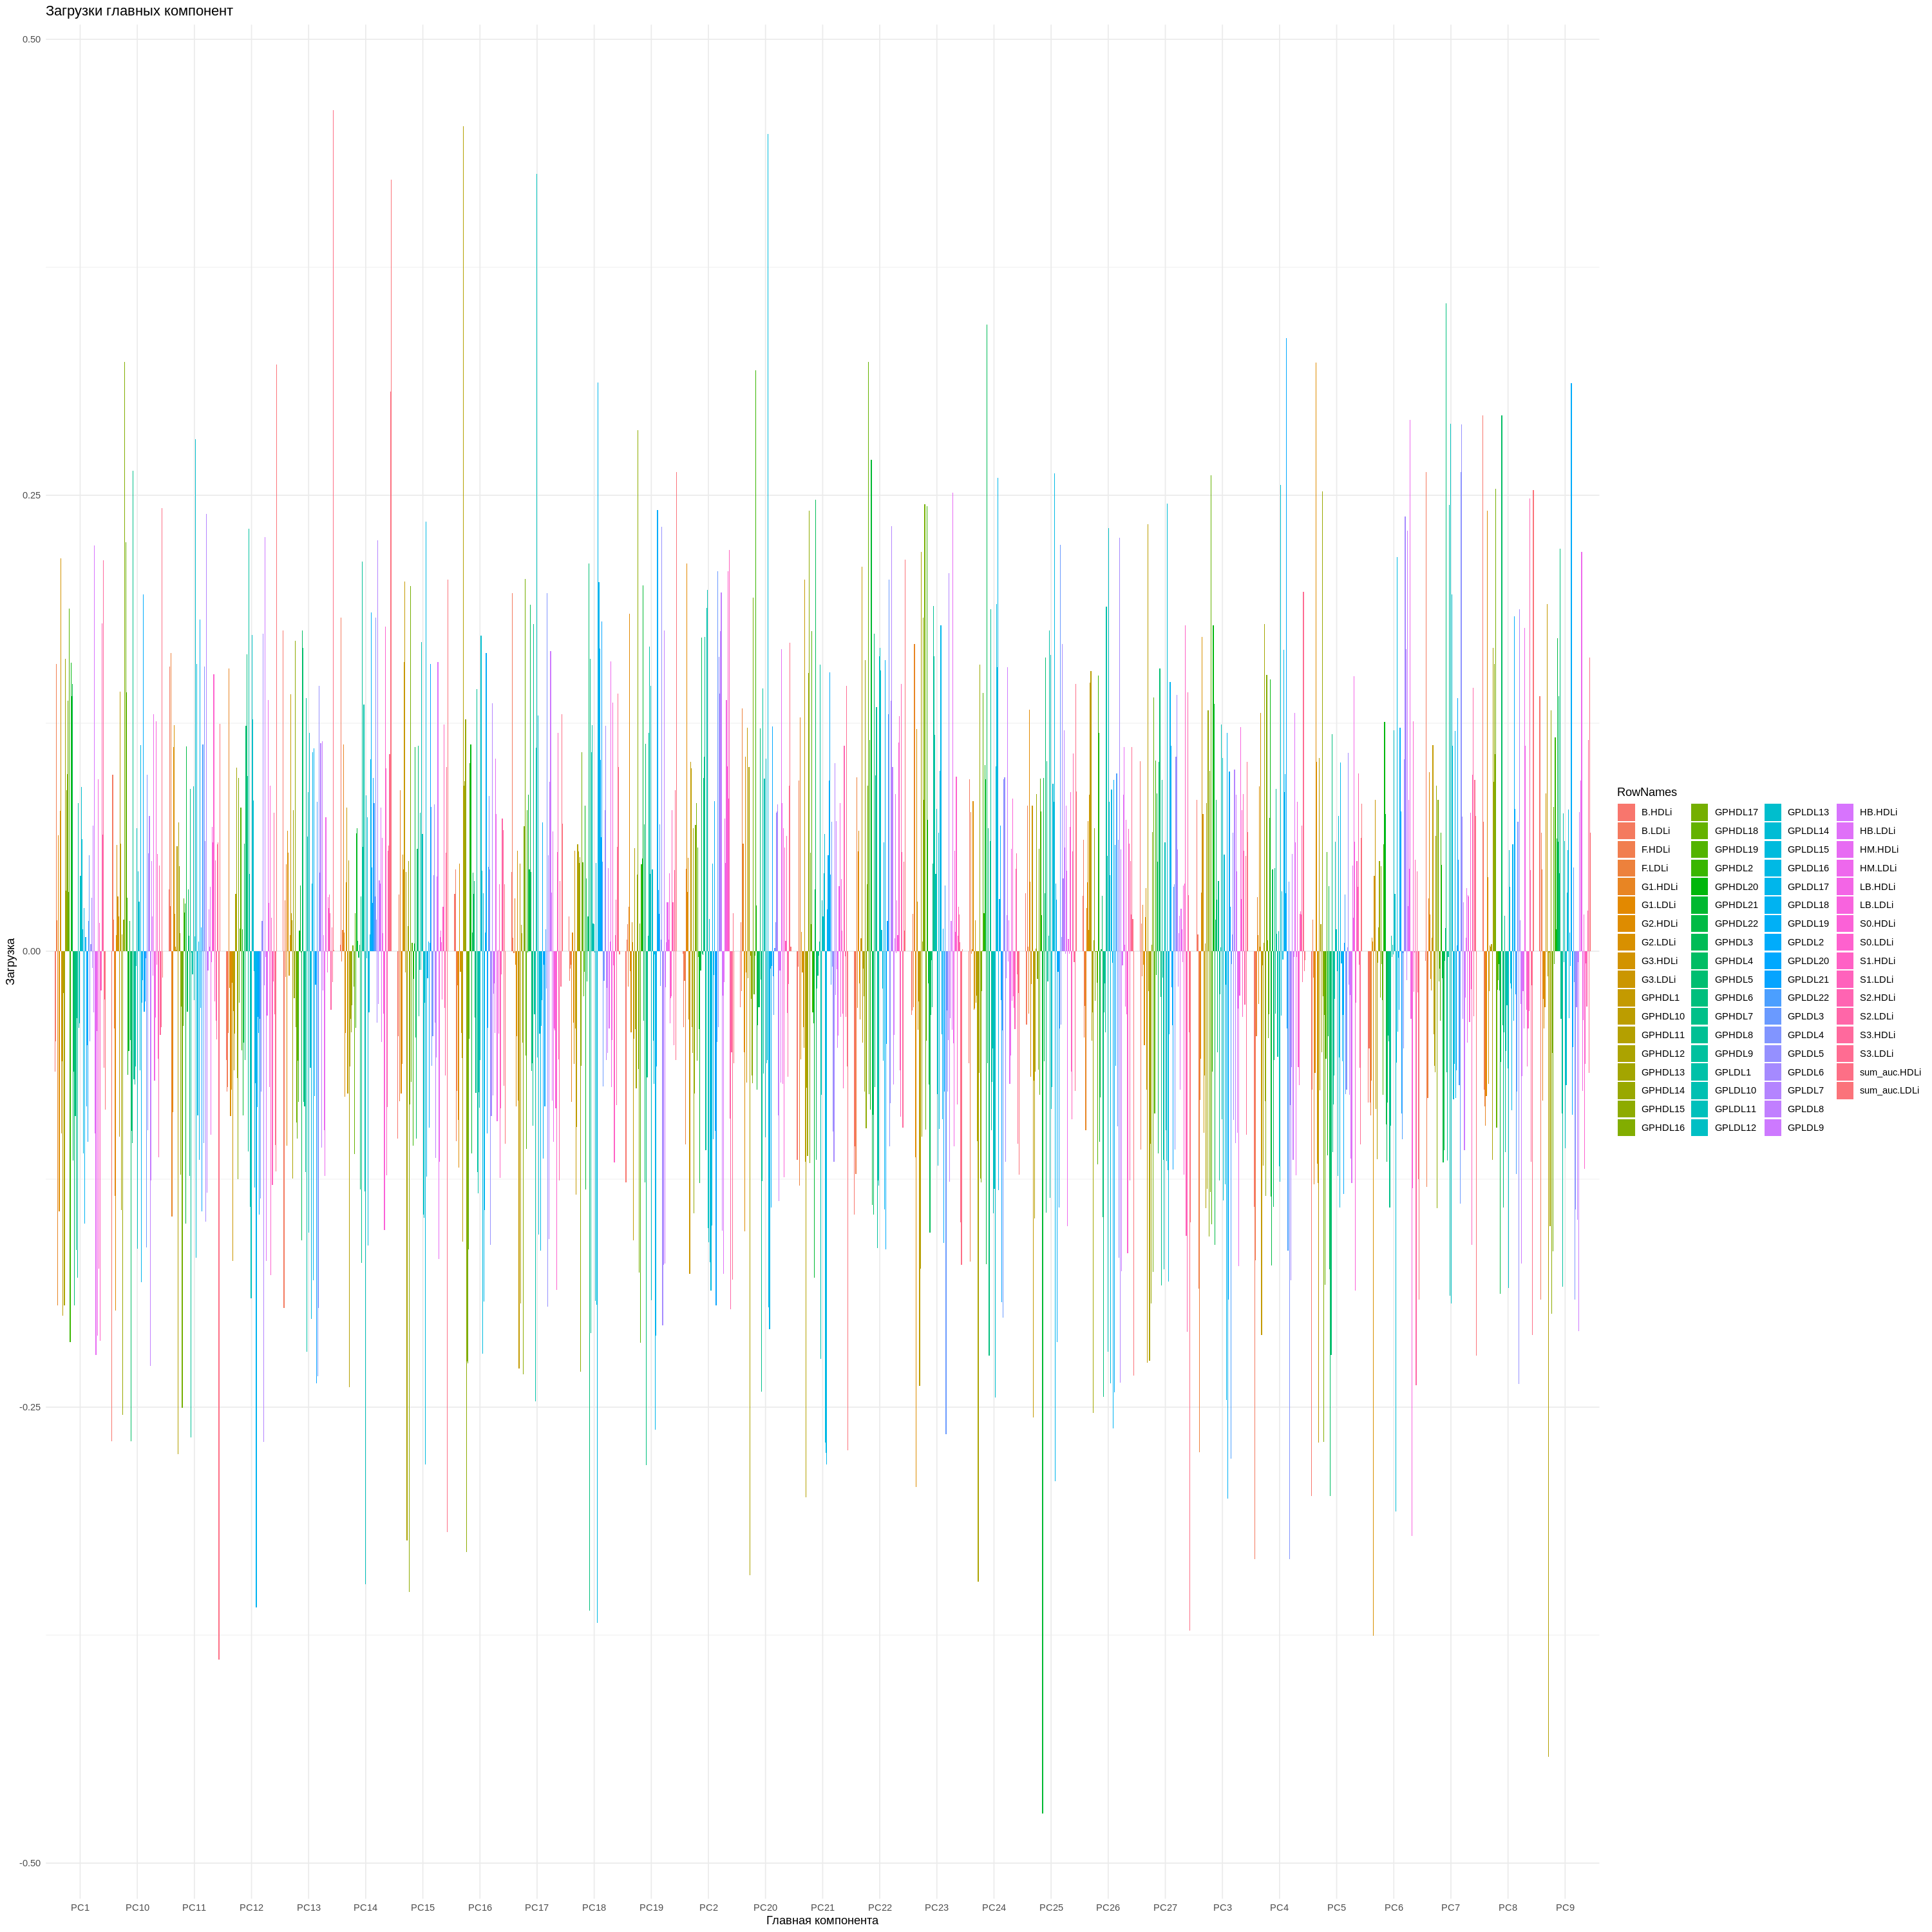

In [127]:
# Построение графика загрузок
options(repr.plot.width = 25, repr.plot.height = 25)
ggplot(loadings_long, aes(x = PrincipalComponent, y = Loading, fill = RowNames)) +
  geom_bar(stat = "identity", position = "dodge") +
  theme_minimal() +
  labs(title = "Загрузки главных компонент", x = "Главная компонента", y = "Загрузка")

График красивый, но совершенно не информативный. На глаз оценить влияние каждой перемнной на каждую из компонент по прежнему не представляется возможным. Таким образом приходим к выводу: необходимо сократить начальное количество переменных и проводить подобный анализ по частям. В данном случае пойдем на следующее упрощение: в каждой компоненте определим переменную вносящую максимальный вклад с помощью функции поиска наибольшего значения.

In [128]:
# Найти индекс строки с максимальным значением в каждом столбце
max_row_indices <- apply(loadings_df[, -1], 2, which.max)

# Создать новый DataFrame, содержащий максимальные значения и соответствующие имена строк
loadings_df_max_values <- data.frame(RowNames = loadings_df$RowNames[max_row_indices],
                                    MaxValues = apply(loadings_df[, -1], 2, max))

# Вывести результат
print(loadings_df_max_values)

         RowNames MaxValues
PC1       HB.HDLi 0.2225216
PC2       S1.LDLi 0.2200557
PC3       GPHDL18 0.2608783
PC4       GPLDL20 0.3362096
PC5       G2.HDLi 0.3229203
PC6       HM.LDLi 0.2912071
PC7        GPHDL6 0.3553689
PC8        B.HDLi 0.2938988
PC9        GPLDL2 0.3114088
PC10      GPHDL16 0.3231866
PC11      GPLDL13 0.2808641
PC12 sum_auc.LDLi 0.3217015
PC13 sum_auc.HDLi 0.4613268
PC14 sum_auc.LDLi 0.4231074
PC15      GPLDL16 0.2354327
PC16      GPHDL11 0.4521747
PC17      GPLDL11 0.4262927
PC18      GPLDL17 0.3117387
PC19      GPHDL15 0.2856408
PC20      GPLDL15 0.4481876
PC21       GPHDL3 0.2476584
PC22      GPHDL18 0.3231159
PC23      HM.HDLi 0.2514414
PC24       GPHDL3 0.3435815
PC25      GPLDL16 0.2619148
PC26      GPLDL12 0.2320707
PC27      GPLDL14 0.2453853


In [134]:
# Создадим список уникальных имен переменных из loadings_df_max_values:
unique(loadings_df_max_values$RowNames)

[1] "HB.HDLi"      "S1.LDLi"      "GPHDL18"      "GPLDL20"      "G2.HDLi"     
 [6] "HM.LDLi"      "GPHDL6"       "B.HDLi"       "GPLDL2"       "GPHDL16"     
[11] "GPLDL13"      "sum_auc.LDLi" "sum_auc.HDLi" "GPLDL16"      "GPHDL11"     
[16] "GPLDL11"      "GPLDL17"      "GPHDL15"      "GPLDL15"      "GPHDL3"      
[21] "HM.HDLi"      "GPLDL12"      "GPLDL14"

In [136]:
# MANOVA
manova_formula <- paste("cbind(", paste(unique(loadings_df_max_values$RowNames), collapse = ", "), ") ~ Plaque")

manova_model <- manova(as.formula(manova_formula), data)
summary(manova_model)

          Df Pillai approx F num Df den Df Pr(>F)
Plaque     3 2.6137  0.88258     69      9  0.648
Residuals 23                                     

In [137]:
# ANOVA
summary.aov(manova_model)

 Response HB.HDLi :
            Df  Sum Sq Mean Sq F value Pr(>F)
Plaque       3  31.944 10.6479  1.7129 0.1922
Residuals   23 142.973  6.2162               

 Response S1.LDLi :
            Df Sum Sq Mean Sq F value Pr(>F)
Plaque       3  5.236  1.7454  0.6186   0.61
Residuals   23 64.899  2.8217               

 Response GPHDL18 :
            Df  Sum Sq  Mean Sq F value Pr(>F)
Plaque       3 0.34453 0.114844   2.232 0.1116
Residuals   23 1.18343 0.051454               

 Response GPLDL20 :
            Df  Sum Sq Mean Sq F value Pr(>F)
Plaque       3 0.35613 0.11871  1.2958 0.2997
Residuals   23 2.10703 0.09161               

 Response G2.HDLi :
            Df Sum Sq Mean Sq F value Pr(>F)
Plaque       3  4.821  1.6072  0.9664 0.4254
Residuals   23 38.250  1.6630               

 Response HM.LDLi :
            Df  Sum Sq Mean Sq F value Pr(>F)
Plaque       3  0.7867 0.26223  0.4559 0.7157
Residuals   23 13.2301 0.57522               

 Response GPHDL6 :
            Df  Sum Sq  Mean S

В результате многомерного дисперсионного анализа мы не выявили никакой связи между `Plaque` и фракциями холестерина. Однако учитывая, что мы выделяли главные компоненты, вполне вероятно, что связь может быть установлена при более детальном анализе.  
Результаты одномерного анализа показывают статистически не значимую связь между `Plaque` и переменными `GPLDL16`, `GPLDL17` и `HM.HDLi` (во всех случаях Pr(>F) больше 0.05).

---
*

Warning message in qt((1 + p)/2, ns - 1):
“NaNs produced”


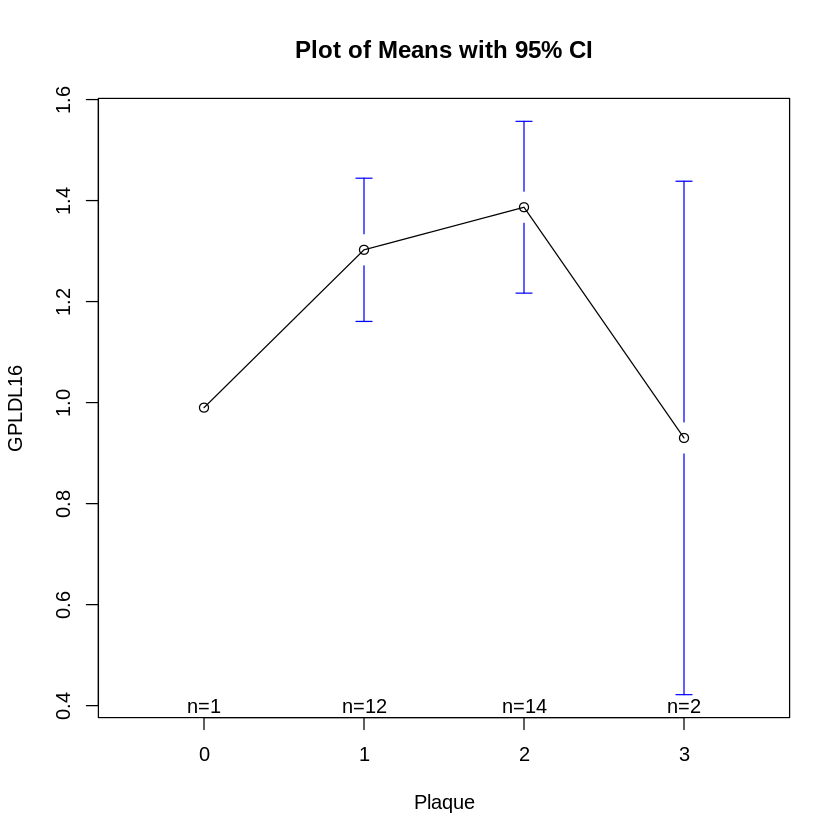

In [146]:
options(repr.plot.width = 7, repr.plot.height = 7)
plotmeans(GPLDL16 ~ Plaque, data,
          xlab = "Plaque",
          ylab = "GPLDL16",
          main = "Plot of Means with 95% CI")

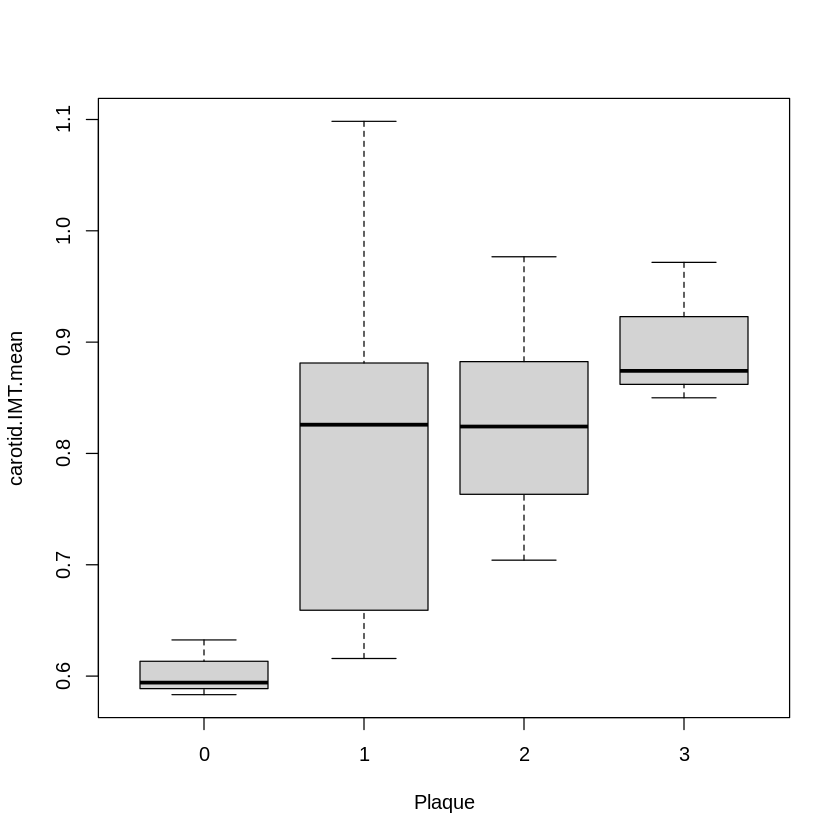

In [151]:
boxplot(carotid.IMT.mean ~ Plaque, data,
        xlab = "Plaque",
        ylab = "carotid.IMT.mean")